# House Prices: Advanced Regression Techniques
This is the notebook for the dataset house prices in, her I will explore different models and train a machine learning algorithm for the given dataset
#### setup
General imports used during this exercise

In [1]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import kaggle.api as kg

# Get the data
Downloads the train.csv dataset from Kaggle using the kaggle API. Also dowloads the data description which is a description of what the data means, this is just for my own sake so I know what I am dealing with.

In [2]:
PATH = "Datasets/"
kg.competition_download_file(competition="house-prices-advanced-regression-techniques", file_name="train.csv", path=PATH)
kg.competition_download_file(competition="house-prices-advanced-regression-techniques", file_name="data_description.txt")

train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
def load_set():
    return pd.read_csv(os.path.join("Datasets", "train.csv"))

In [4]:
house_prices = load_set()

# Discover and visualize the data
Now that we have the dataset, it is time to get a good overview of what actually is a part of this dataset, we will need to visualize it using different methods. This is a big part of understanding what to do with the datasets and how to solve this exercise.

In [5]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
house_prices['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [8]:
house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0473CF208>,
      dtype=object)

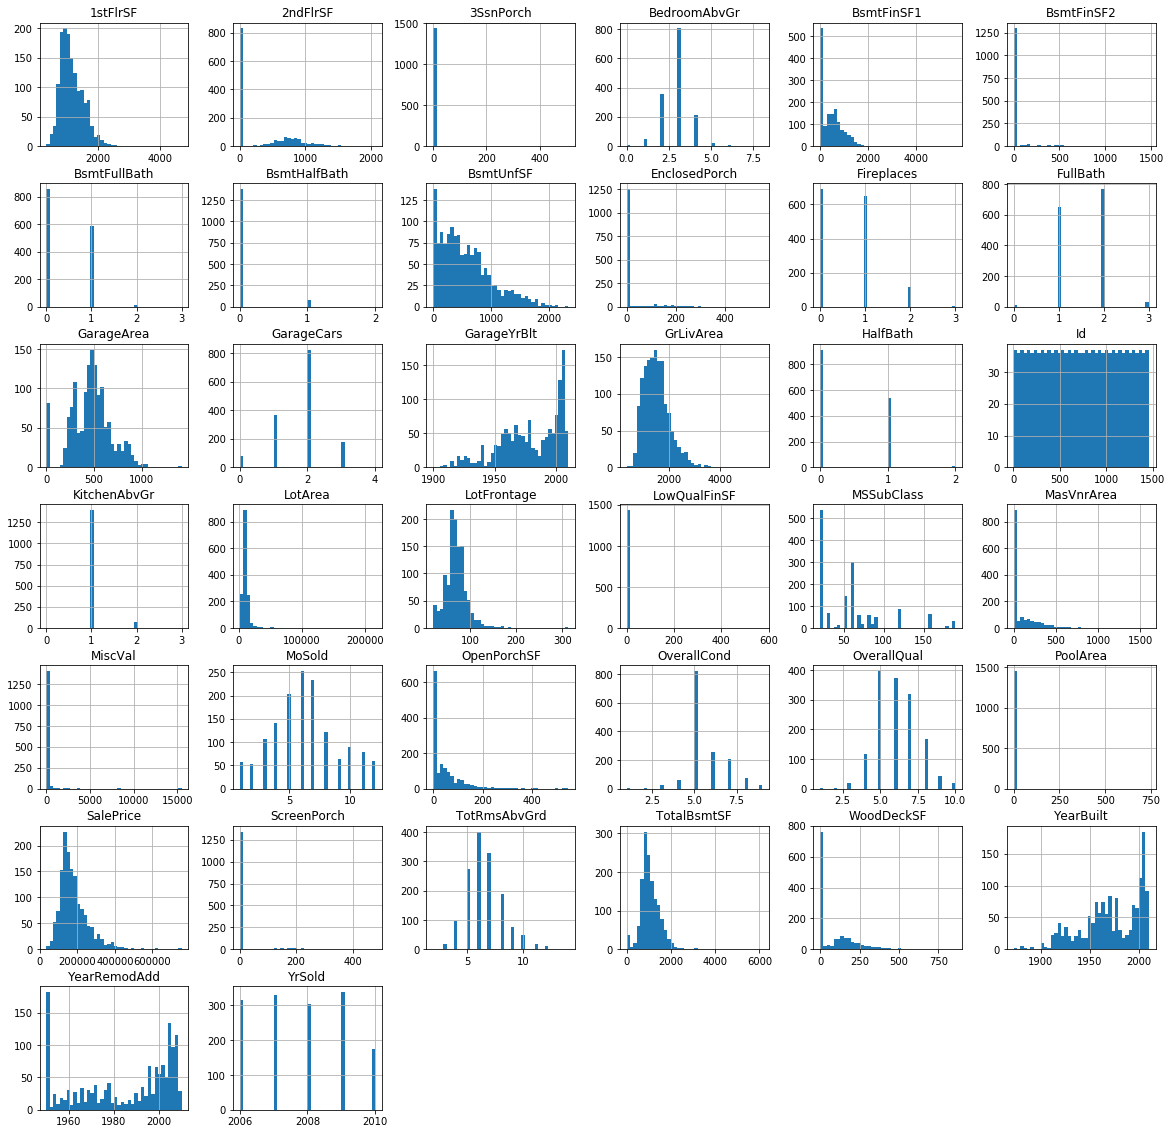

In [9]:
house_prices.hist(bins=40, figsize=(20, 20))

This is just a brief overview of the different values, and it doesn't tell us too much. Before I look to much into the data I will create a test set and a train set for the model, so that we do not look at all the values before we split it. We will train our models on the train set, and test our models on the test set too see how good they are.

In [10]:
house_train, house_test = train_test_split(house_prices)

In [11]:
len(house_train)

1095

In [12]:
len(house_test)

365

In [13]:
discover = house_train.copy()

We see where most houses has been sold to check what part is most popular, we can see that it is North Ames

In [19]:
discover["Neighborhood"].value_counts()

NAmes      164
CollgCr    115
OldTown     83
Somerst     74
Edwards     72
NridgHt     64
Gilbert     60
NWAmes      54
Sawyer      49
SawyerW     45
Crawfor     41
BrkSide     39
NoRidge     37
Mitchel     33
IDOTRR      28
Timber      24
SWISU       21
StoneBr     20
ClearCr     18
MeadowV     13
Blmngtn     13
BrDale      12
Veenker      7
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64